### Import Libraries

In [1]:
import pandas as pd
import numpy as  np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go 
from plotly.offline import plot , init_notebook_mode
init_notebook_mode(connected = True)
import warnings 
warnings.filterwarnings("ignore")

### Import Data

In [ ]:
df = pd.read_csv("./Mall_Customers.csv")

### Exploratory Data Analysis

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
cols = df.columns 
cols

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [7]:
df.rename(columns = {
    "CustomerID" : "customer_id" , 
    "Gender" : "gender" ,
    "Age" : "age" , 
    "Annual Income (k$)" : "annual_income" , 
    "Spending Score (1-100)" : "spending_score"
} , inplace = True)

In [8]:
df.isnull().sum()

customer_id       0
gender            0
age               0
annual_income     0
spending_score    0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     200 non-null    int64 
 1   gender          200 non-null    object
 2   age             200 non-null    int64 
 3   annual_income   200 non-null    int64 
 4   spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [10]:
df["gender"].value_counts()

gender
Female    112
Male       88
Name: count, dtype: int64

In [11]:
df_duplicated = df[df.duplicated()]
df_duplicated

,customer_id,gender,age,annual_income,spending_score


### Univariate Variable Analysis 

<Figure size 800x400 with 0 Axes>

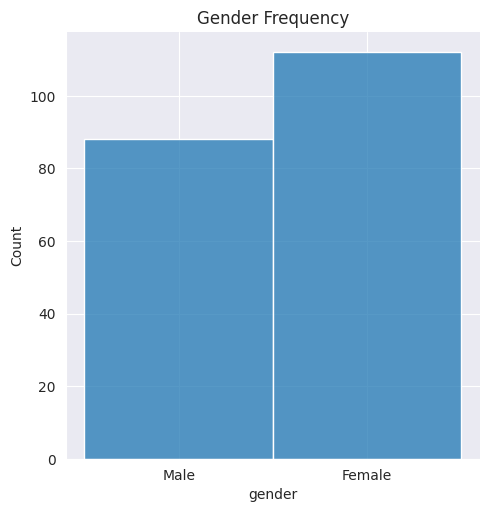

In [12]:
plt.figure(figsize=(8,4))
sns.set_style("darkgrid")
sns.displot(df["gender"] , bins=30)
plt.title("Gender Frequency")
plt.show()

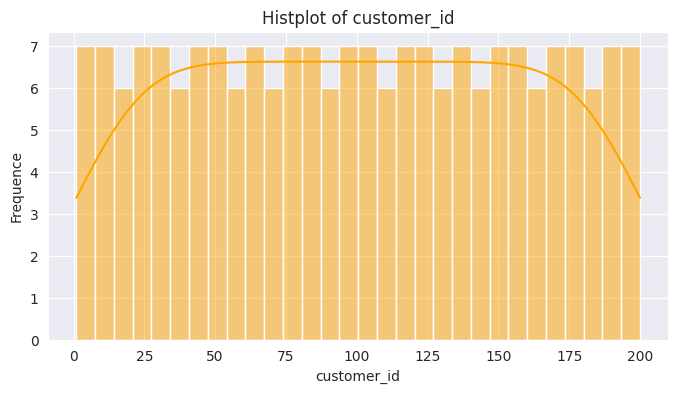

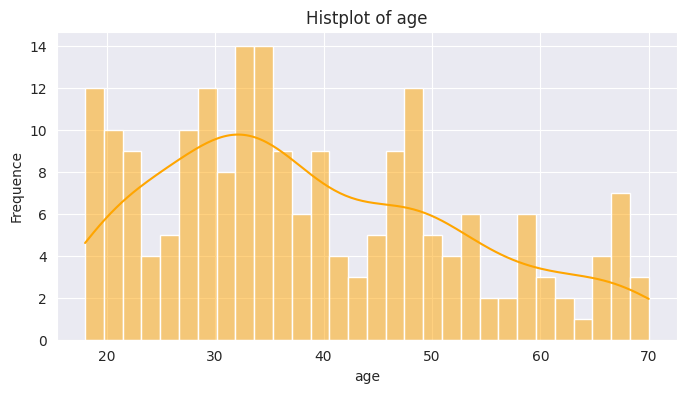

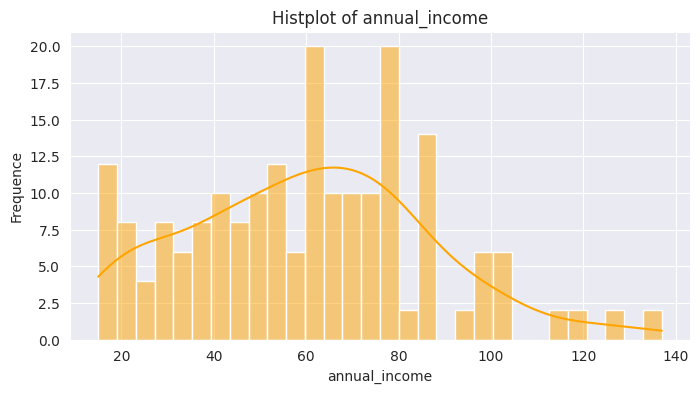

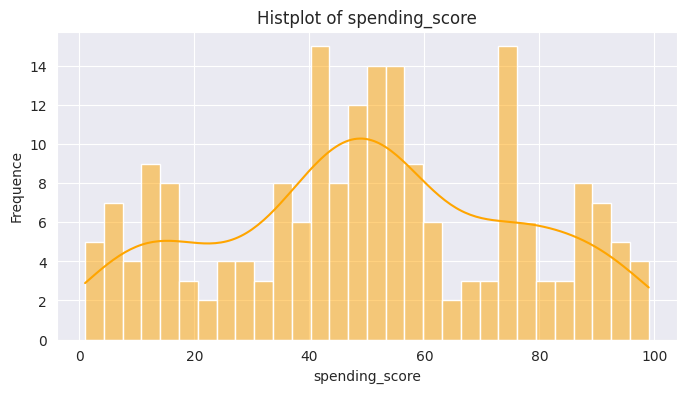

In [13]:
numeric_cols = df.select_dtypes(include = ["int64"])

for numeric_col in numeric_cols.columns :
    plt.figure(figsize=(8,4))
    sns.histplot(df[numeric_col] , bins=30 , kde=True , color="orange")
    plt.xlabel(numeric_col)
    plt.ylabel("Frequence")
    plt.title(f"Histplot of {numeric_col}")
    plt.show()

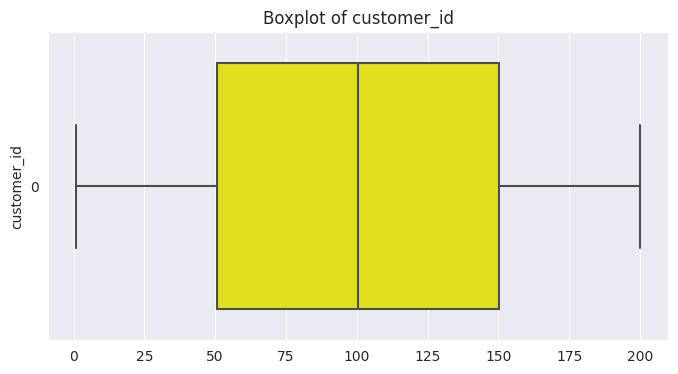

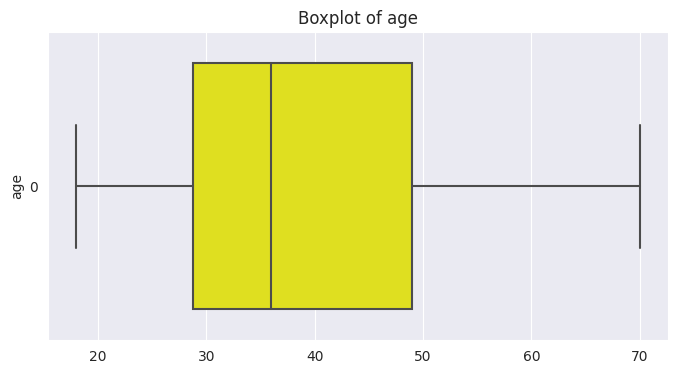

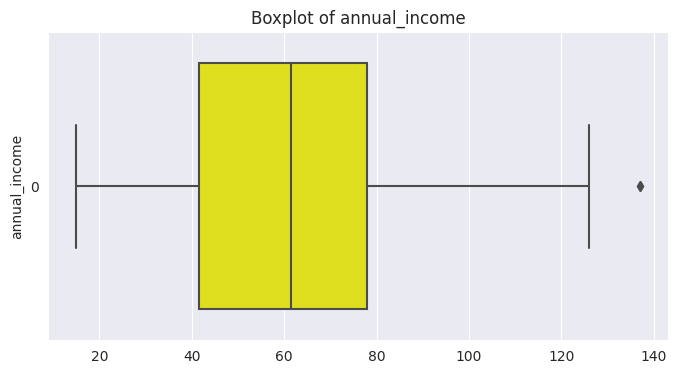

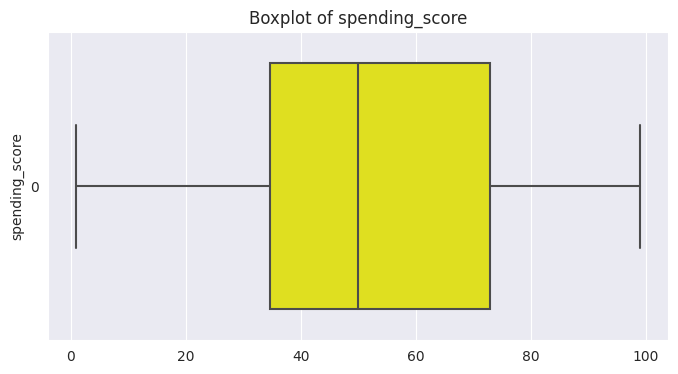

In [14]:
for numeric_col in numeric_cols.columns : 
    plt.figure(figsize=(8,4))
    sns.boxplot(data = df[numeric_col] , orient = "h" , color = "yellow")
    plt.ylabel(numeric_col)
    plt.title(f"Boxplot of {numeric_col}")

In [15]:
df["gender"].replace ({
    0 : "Male" , 
    1 : "Female"
} , inplace = True)

### Correlation

In [16]:
numeric_cols = df[["age" , "annual_income" , "spending_score"]]
correlation = numeric_cols.corr()
correlation

,age,annual_income,spending_score
age,1.000000,-0.012398,-0.327227
annual_income,-0.012398,1.000000,0.009903
spending_score,-0.327227,0.009903,1.000000


### Heatmap

<Axes: >

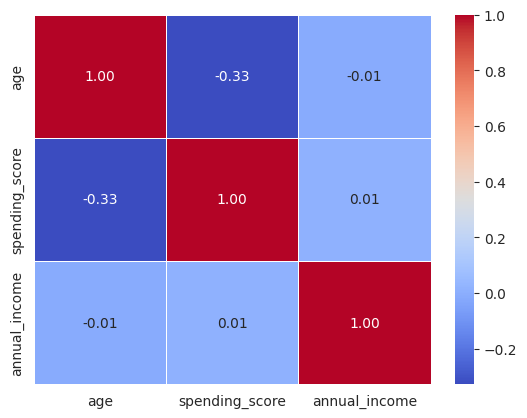

In [17]:
numeric_cols = df[["age" , "spending_score" , "annual_income"]]
correlation = numeric_cols.corr()

sns.heatmap(correlation , annot = True , cmap = "coolwarm"  ,fmt = ".2f" , linewidths = 0.5)

There are only few very low positive correlations  

### Bivariate Variable Analysis

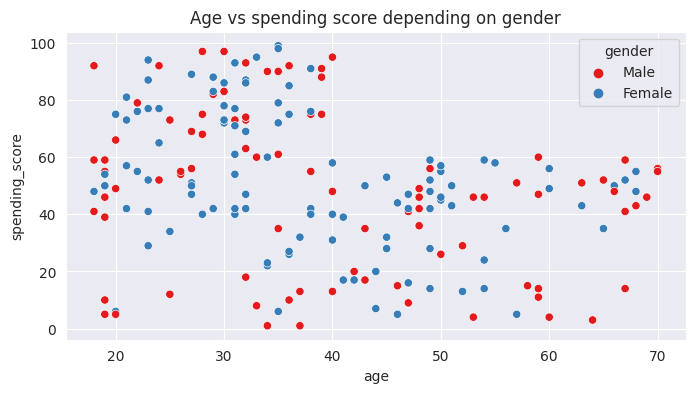

In [18]:
plt.figure(figsize = (8,4))
sns.scatterplot(data = df , x="age" , y = "spending_score" , hue="gender" , palette = "Set1")
plt.title("Age vs spending score depending on gender")
plt.show()

Text(0.5, 1.0, 'Age vs annual income depending on gender')

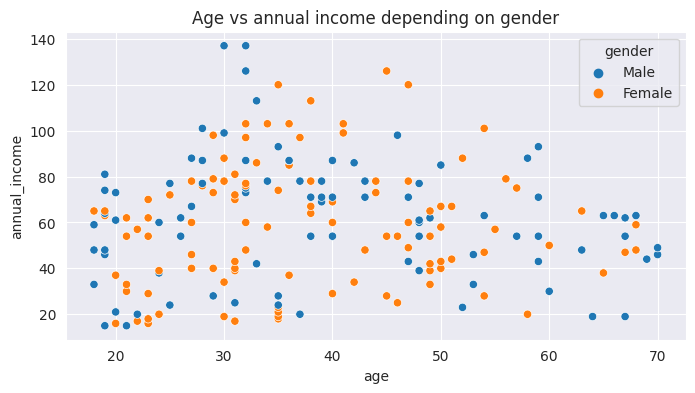

In [19]:
plt.figure(figsize=(8,4))
sns.scatterplot(data = df , x="age" , y="annual_income" , hue="gender")
plt.title("Age vs annual income depending on gender")

<Axes: xlabel='annual_income', ylabel='spending_score'>

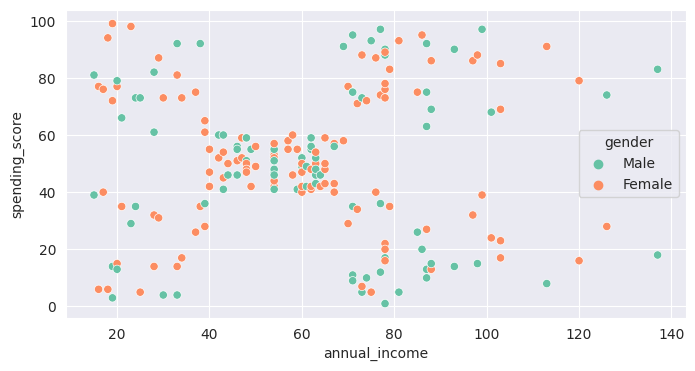

In [20]:
plt.figure(figsize = (8,4))
sns.scatterplot(data = df , x="annual_income" , y = "spending_score" , hue="gender" , palette = "Set2")


Text(0.5, 1.0, 'Gender vs Annual income')

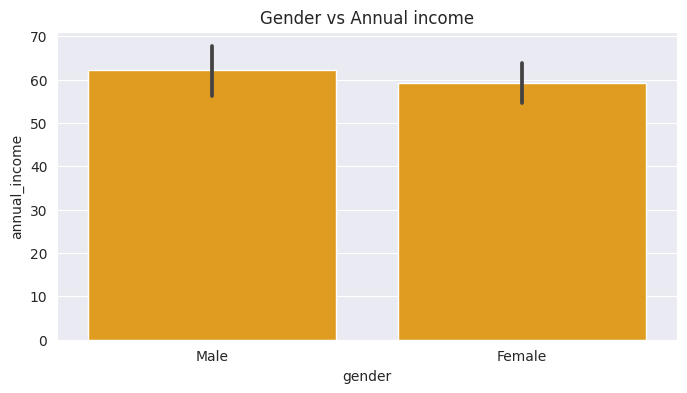

In [21]:
plt.figure(figsize = (8,4))
sns.barplot (data = df , x="gender" , y = "annual_income" , color = "orange")
plt.title("Gender vs Annual income")

<Axes: xlabel='annual_income', ylabel='spending_score'>

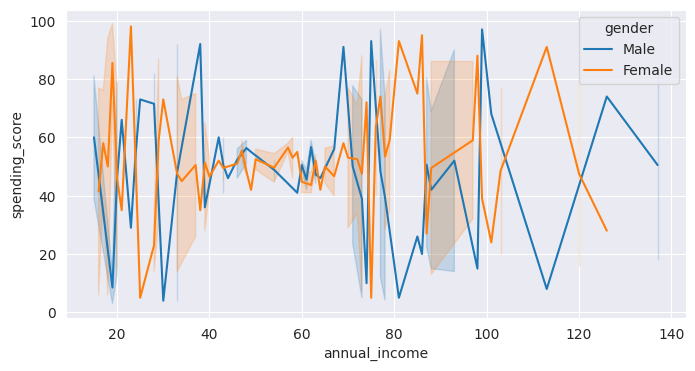

In [22]:
plt.figure(figsize = (8,4))
sns.lineplot(data = df , x="annual_income" , y = "spending_score" , hue="gender" )

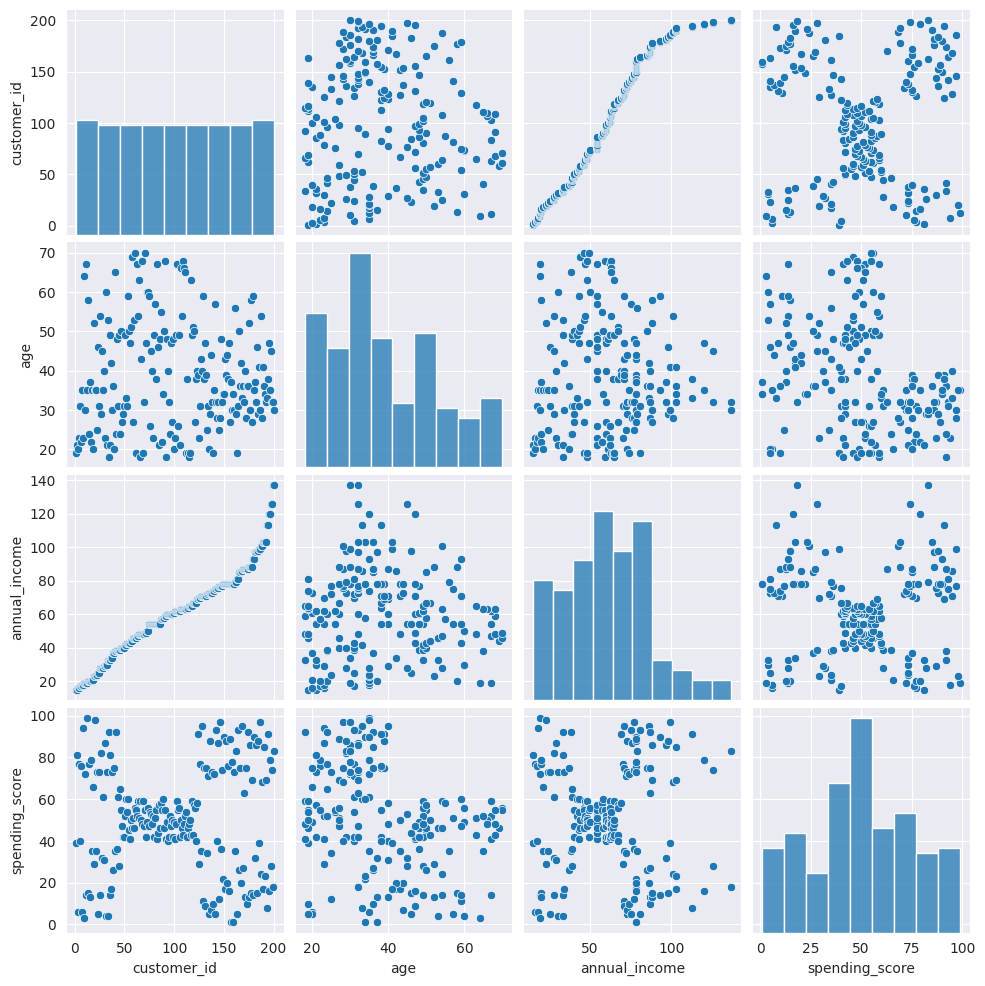

In [23]:
sns.pairplot(df)

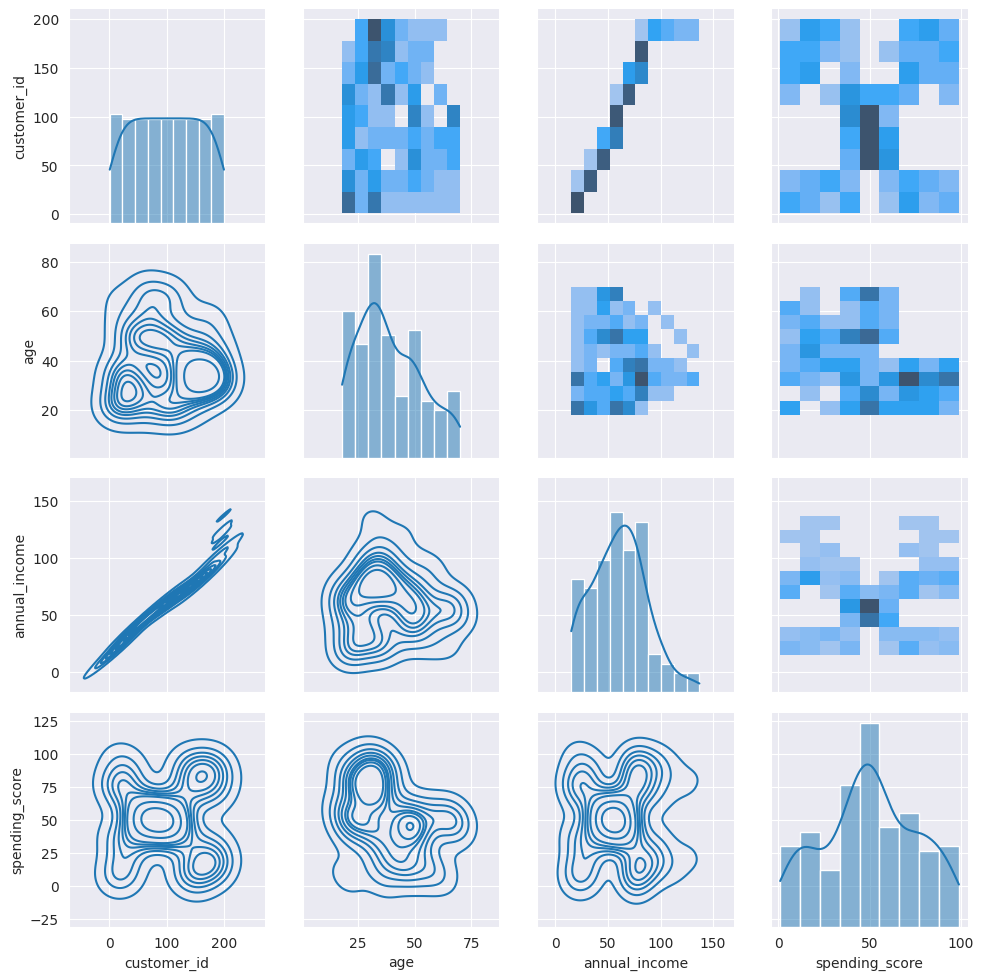

In [24]:
g = sns.PairGrid(df)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.histplot , kde = True)

### Machine Learning

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [26]:
X = df[["age" , "spending_score" , "annual_income"]]
y = df["gender"]

In [27]:
# df["gender"].replace({
#     "Male" : 0 , 
#     "Female" : 1
# } , inplace = True)

In [28]:
## dividing model for train-test-split
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size = 0.2 , random_state = 42)

In [29]:
# Standard Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test)

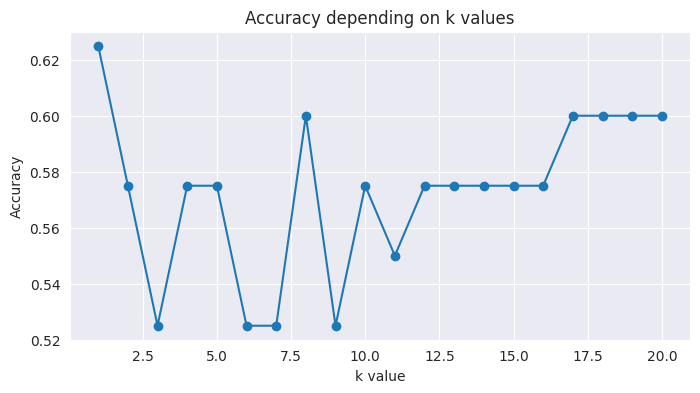

In [30]:
## Hyperparameter Tuning
k_values = []
accuracy_values = []

for k in range(1,21) : # 21 is just a random number
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train , y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_pred , y_test)
    k_values.append(k)
    accuracy_values.append(accuracy)



plt.figure(figsize =(8,4))
plt.plot(k_values , accuracy_values , marker = "o")
plt.title("Accuracy depending on k values")
plt.xlabel("k value")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

In [31]:
model = KNeighborsClassifier(n_neighbors = 1)

In [32]:
model.fit(X_train , y_train)

KNeighborsClassifier(n_neighbors=1)

In [33]:
y_pred = model.predict(X_test)

In [34]:
print( "Accuracy_score : " , accuracy_score(y_pred,y_test))

Accuracy_score :  0.625
